## Libraries and variables

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

data_path = '../01_Data/'
file_name = 'PSP_Jan_Feb_2019.xlsx'
file_path = data_path + file_name

## Data load

In [34]:
df = pd.read_excel(file_path, index_col=0)

## Data cleaning

In [35]:
# How many rows and columns and first look
# Result: 50410 rows and 7 columns
df

,tmsp,country,amount,success,PSP,3D_secured,card
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners
3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners
4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners
...,...,...,...,...,...,...,...
50405,2019-02-28 23:45:39,Switzerland,415,0,UK_Card,0,Visa
50406,2019-02-28 23:46:48,Austria,91,0,UK_Card,0,Master
50407,2019-02-28 23:47:04,Austria,91,0,UK_Card,0,Master
50408,2019-02-28 23:47:36,Austria,91,0,UK_Card,0,Master


### Missing values
Possibilities:
- Deletion of missing values
- Imputation by statistical methods (e.g. average, median, modus)
- Forward and backward filling for time series data

In [36]:
# Check for missing values
# Result: No missing values in columns
print(df.isna().sum())

tmsp          0
country       0
amount        0
success       0
PSP           0
3D_secured    0
card          0
dtype: int64


### Outlier detection
**Identification** of outliers by statistical methods (e.g. Z-Score, Interquartile Range(IQR)) or by visualizations (e.g. boxplot) \
**Remove or correct outliers** depending on business context

In [37]:
# Outlier detection for tmsp (timestamp). Must be between 01.01.2019 00:00:00 and 28.02.2019 23:59:59
# Result: No outliers
print(df['tmsp'].min())
print(df['tmsp'].max())

2019-01-01 00:01:11
2019-02-28 23:48:19


In [38]:
# Outlier detection for country. Only 'Germany', 'Austria' or 'Switzerland' are valid
# Result: No outliers
print(df['country'].unique())

['Germany' 'Austria' 'Switzerland']


In [39]:
# Outlier detection for success. Only 0 or 1 are valid
# Result: No outliers
print(df['success'].unique())

[0 1]


In [40]:
# Outlier detection for PSP. Only 'UK_Card', 'Simplecard', 'Moneycard' or 'Goldcard' are valid
# Result: No outliers
print(df['PSP'].unique())

['UK_Card' 'Simplecard' 'Moneycard' 'Goldcard']


In [41]:
# Outlier detection for PSP. Only 0 or 1 are valid
# Result: No outliers
print(df['3D_secured'].unique())

[0 1]


In [42]:
# Outlier detection for PSP. Only 'Visa', 'Diners' or 'Master' are valid
# Result: No outliers
print(df['card'].unique())

['Visa' 'Diners' 'Master']


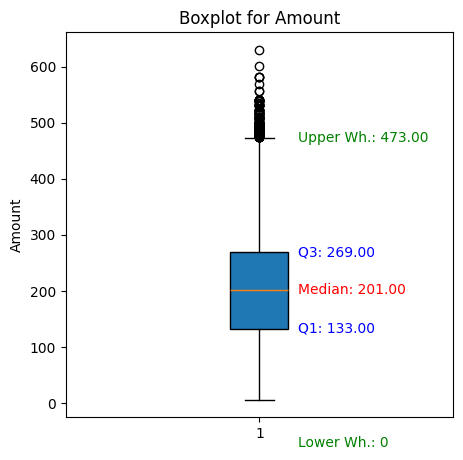

In [43]:
# Outlier detection for amount
# Result: some outliers for amount detected
plt.figure(figsize=(5, 5))
boxplot = plt.boxplot(df['amount'], patch_artist=True)

plt.title('Boxplot for Amount')
plt.ylabel('Amount')

q1 = df['amount'].quantile(0.25)
q3 = df['amount'].quantile(0.75)
median = df['amount'].median()
whisker_low = q1 - 1.5 * (q3 - q1)
whisker_high = q3 + 1.5 * (q3 - q1)

# Add labels
plt.text(1.1, q1, f'Q1: {q1:.2f}', verticalalignment='center', color='blue')
plt.text(1.1, q3, f'Q3: {q3:.2f}', verticalalignment='center', color='blue')
plt.text(1.1, median, f'Median: {median:.2f}', verticalalignment='center', color='red')
plt.text(1.1, whisker_low, f'Lower Wh.: 0', verticalalignment='center', color='green')
plt.text(1.1, whisker_high, f'Upper Wh.: {whisker_high:.2f}', verticalalignment='center', color='green')

plt.show()

In [44]:
# 153 transactions are outliers for amount
(df['amount'] > 473).sum()

153

### Data consolidation and integration
**Merge** of data from different sources\
**Reconciliation** of data for the same entity. Bring them together.

In [45]:
# Not applicable for this data

### Duplicate handling
**Check** for duplicated records
**Revome** duplicated records or **aggregate** features

In [46]:
# Check for duplicates
# Result: 81 duplicated records
grouped = df.groupby(["tmsp", "country", "amount", "success", "PSP", "3D_secured", "card"]).size()
print(grouped[grouped > 1].count())

81


In [47]:
# Remove duplicates
df = df.drop_duplicates()
df = df.reset_index(drop=True)

### Save cleaned data

In [48]:
# Save as CSV for better versioning in Git
df.to_csv(data_path + '3-1_psp-data_cleaned.csv')